In [739]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set(style="darkgrid")
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [740]:
data = pd.read_csv('./Leads.csv')

In [741]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [742]:
missing=data.isnull().sum().reset_index().rename(columns={0:'missNum'})

In [743]:
missing.loc[missing['missNum']>0,:]

,index,missNum
3,Lead Source,36
7,TotalVisits,137
9,Page Views Per Visit,137
10,Last Activity,103
11,Country,2461
12,Specialization,1438
13,How did you hear about X Education,2207
14,What is your current occupation,2690
15,What matters most to you in choosing a course,2709
24,Tags,3353


# 将Select替换为nan 并将空值大于40%的列删除

In [744]:
data.replace('Select',np.nan,inplace=True)
kong = pd.DataFrame(data.isnull().sum().sort_values(ascending=False),columns=['kongzhi'])
per = round(kong['kongzhi']/data.shape[0],2)*100
kong['per(%)'] = per
drop_col = kong[kong['per(%)'] > 40].index.tolist()
data.drop(columns=drop_col,axis=0,inplace=True)
data.shape[1]

30

In [745]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [746]:
data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [747]:
data['Lead Source'].replace('google','Google',inplace=True)
data['Lead Source'].replace('bing','Other',inplace=True)
data['Lead Source'].replace('Click2call','Other',inplace=True)
data['Lead Source'].replace('Social Media','Other',inplace=True)
data['Lead Source'].replace('Press_Release','Other',inplace=True)
data['Lead Source'].replace('youtubechannel','Other',inplace=True)
data['Lead Source'].replace('WeLearn','Other',inplace=True)
data['Lead Source'].replace('Pay per Click Ads','Other',inplace=True)
data['Lead Source'].replace('Live Chat','Other',inplace=True)
data['Lead Source'].replace('testone','Other',inplace=True)
data['Lead Source'].replace('Pay per Click Ads','Other',inplace=True)
data['Lead Source'].replace('welearnblog_Home','Other',inplace=True)
data['Lead Source'].replace('blog','Other',inplace=True)
data['Lead Source'].replace('NC_EDM','Other',inplace=True)

data['Last Activity'].replace('Approached upfront','Other',inplace=True)
data['Last Activity'].replace('View in browser link Clicked','Other',inplace=True)
data['Last Activity'].replace('Email Received','Other',inplace=True)
data['Last Activity'].replace('Resubscribed to emails','Other',inplace=True)
data['Last Activity'].replace('Email Marked Spam','Other',inplace=True)
data['Last Activity'].replace('Visited Booth in Tradeshow','Other',inplace=True)


In [748]:
X = data.drop(columns=['Converted'], axis=0)
y = data['Converted']

# 切分数据

In [749]:
from sklearn.model_selection import train_test_split
data, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 众数填充 Lead Sourse

In [750]:
ls = data['Lead Source'].value_counts()
ls

Lead Source
Google              2143
Direct Traffic      1909
Olark Chat          1338
Organic Search       857
Reference            400
Welingak Website     109
Referral Sites        92
Facebook              35
Other                 21
Name: count, dtype: int64

In [751]:
LeadSource_imputer = SimpleImputer(strategy='most_frequent')
LeadSource_imputed = LeadSource_imputer.fit_transform(np.array(data['Lead Source']).reshape(-1,1))
t_LeadSource_imputed = LeadSource_imputer.transform(np.array(x_test['Lead Source']).reshape(-1,1))
LeadSource_imputed

array([['Direct Traffic'],
       ['Direct Traffic'],
       ['Direct Traffic'],
       ...,
       ['Google'],
       ['Google'],
       ['Organic Search']], dtype=object)

In [752]:
data['Lead Source'] = LeadSource_imputed.flatten()
x_test['Lead Source'] = t_LeadSource_imputed.flatten()

In [753]:
data['Lead Source'].isnull().sum()
x_test['Lead Source'].isnull().sum()

0

0

In [754]:
x_test['Lead Source'].value_counts()

Lead Source
Google              740
Direct Traffic      634
Olark Chat          417
Organic Search      297
Reference           134
Welingak Website     33
Referral Sites       33
Facebook             20
Other                 2
Name: count, dtype: int64

# TotalVisits

In [755]:
# 所有 TotalVisits 为空的记录，Page Views Per Visit 也为空
data[data['TotalVisits'].isnull()]['Page Views Per Visit'].isnull().sum()

100

In [756]:
data['TotalVisits'].value_counts()

TotalVisits
0.0      1657
2.0      1259
3.0       971
4.0       820
5.0       590
6.0       354
1.0       301
7.0       234
8.0       169
9.0       130
10.0       87
11.0       64
12.0       32
13.0       30
14.0       29
15.0       17
18.0       13
16.0       12
17.0       12
20.0       10
19.0        6
25.0        4
27.0        4
23.0        4
21.0        4
24.0        4
22.0        3
26.0        2
55.0        1
29.0        1
115.0       1
251.0       1
30.0        1
41.0        1
54.0        1
141.0       1
Name: count, dtype: int64

In [757]:
TotalVisits_imputer = SimpleImputer(strategy='constant', fill_value=0.0)
TotalVisits_imputed = TotalVisits_imputer.fit_transform(np.array(data['TotalVisits']).reshape(-1,1))
t_TotalVisits_imputed = TotalVisits_imputer.transform(np.array(x_test['TotalVisits']).reshape(-1,1))
data['TotalVisits'] = TotalVisits_imputed.flatten()
x_test['TotalVisits'] = t_TotalVisits_imputed.flatten()


In [758]:
data['TotalVisits'].isnull().sum()
x_test['TotalVisits'].isnull().sum()

0

0

# Page Views Per Visit

In [759]:
data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    1657
2.00    1319
3.00     898
4.00     669
1.00     496
        ... 
2.29       1
4.40       1
8.50       1
6.67       1
3.38       1
Name: count, Length: 100, dtype: int64

In [760]:
from scipy import stats
# 假设样本数据存储在变量data中
statistic, p_value = stats.shapiro(tu.values)

# 输出检验统计量和P值
print("Shapiro-Wilk statistic:", statistic)
print("P-value:", p_value)

Shapiro-Wilk statistic: 0.3054657578468323
P-value: 1.3255383200524444e-19


In [761]:
PageViewsPerVisit_imputer = SimpleImputer(strategy='constant', fill_value=0.00)
PageViewsPerVisit_imputed = PageViewsPerVisit_imputer.fit_transform(np.array(data['Page Views Per Visit']).reshape(-1,1))
t_PageViewsPerVisit_imputed = PageViewsPerVisit_imputer.transform(np.array(x_test['Page Views Per Visit']).reshape(-1,1))
data['Page Views Per Visit'] = PageViewsPerVisit_imputed.flatten()
x_test['Page Views Per Visit'] = t_PageViewsPerVisit_imputed.flatten()

In [762]:
data['Page Views Per Visit'].isnull().sum()
x_test['Page Views Per Visit'].isnull().sum()

0

0

# Last Activity

In [763]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                 2571
SMS Sent                     2062
Olark Chat Conversation       734
Page Visited on Website       479
Converted to Lead             322
Email Bounced                 252
Email Link Clicked            200
Form Submitted on Website      91
Unreachable                    63
Unsubscribed                   44
Had a Phone Conversation       20
Other                          17
Name: count, dtype: int64

In [764]:
LastActivity_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
LastActivity_imputed = LastActivity_imputer.fit_transform(np.array(data['Last Activity']).reshape(-1,1))
t_LastActivity_imputed = LastActivity_imputer.transform(np.array(x_test['Last Activity']).reshape(-1,1))
data['Last Activity'] = LastActivity_imputed.flatten()
x_test['Last Activity'] = t_LastActivity_imputed.flatten()

In [765]:
data['Last Activity'].isnull().sum()
x_test['Last Activity'].isnull().sum()

0

0

# Country

In [766]:
data['Country'].value_counts().index[0]

'India'

In [767]:
Country_imputer = SimpleImputer(strategy='most_frequent')
Country_imputed = Country_imputer.fit_transform(np.array(data['Country']).reshape(-1,1))
t_Country_imputed = Country_imputer.transform(np.array(x_test['Country']).reshape(-1,1))
data['Country'] = Country_imputed.flatten()
x_test['Country'] = t_Country_imputed.flatten()

In [768]:
data['Country'].isnull().sum()
x_test['Country'].isnull().sum()

0

0

# Specialization

In [769]:
data['Specialization'].value_counts()

Specialization
Finance Management                   756
Human Resource Management            631
Marketing Management                 618
Operations Management                366
Business Administration              316
IT Projects Management               274
Supply Chain Management              261
Banking, Investment And Insurance    253
Media and Advertising                158
Travel and Tourism                   150
International Business               128
Healthcare Management                117
E-COMMERCE                            80
Retail Management                     79
Hospitality Management                79
Rural and Agribusiness                54
E-Business                            45
Services Excellence                   29
Name: count, dtype: int64

In [770]:
Specialization_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
Specialization_imputed = Specialization_imputer.fit_transform(np.array(data['Specialization']).reshape(-1,1))
t_Specialization_imputed = Specialization_imputer.transform(np.array(x_test['Specialization']).reshape(-1,1))
data['Specialization'] = Specialization_imputed.flatten()
x_test['Specialization'] = t_Specialization_imputed.flatten()

In [771]:
data['Specialization'].isnull().sum()
x_test['Specialization'].isnull().sum()

0

0

# What is your current occupation

In [772]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              4227
Working Professional     522
Student                  151
Other                     13
Housewife                  8
Businessman                5
Name: count, dtype: int64

In [773]:
What_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
What_imputed = What_imputer.fit_transform(np.array(data['What is your current occupation']).reshape(-1,1))
t_What_imputed = What_imputer.transform(np.array(x_test['What is your current occupation']).reshape(-1,1))
data['What is your current occupation'] = What_imputed.flatten()
x_test['What is your current occupation'] = t_What_imputed.flatten()

In [774]:
data['What is your current occupation'].isnull().sum()
x_test['What is your current occupation'].isnull().sum()

0

0

# What matters most to you in choosing a course 

In [775]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      4906
Flexibility & Convenience       2
Name: count, dtype: int64

In [776]:
WhatM_imputer = SimpleImputer(strategy='most_frequent')
WhatM_imputed = WhatM_imputer.fit_transform(np.array(data['What matters most to you in choosing a course']).reshape(-1,1))
t_WhatM_imputed = WhatM_imputer.transform(np.array(x_test['What matters most to you in choosing a course']).reshape(-1,1))
data['What matters most to you in choosing a course'] = WhatM_imputed.flatten()
x_test['What matters most to you in choosing a course'] = t_WhatM_imputed.flatten()

In [777]:
data['What matters most to you in choosing a course'].isnull().sum()
x_test['What matters most to you in choosing a course'].isnull().sum()

0

0

# Tags

In [778]:
data['Tags'].value_counts()

Tags
Will revert after reading the email                  1538
Ringing                                               900
Interested in other courses                           388
Already a student                                     359
Closed by Horizzon                                    258
switched off                                          180
Busy                                                  146
Lost to EINS                                          133
Not doing further education                           111
Interested  in full time MBA                           86
Graduation in progress                                 86
invalid number                                         65
Diploma holder (Not Eligible)                          45
wrong number given                                     34
opp hangup                                             28
number not provided                                    21
in touch with EINS                                     11
Lost to O

In [779]:
Tags_imputer = SimpleImputer(strategy='constant', fill_value='NotYet')
Tags_imputed = Tags_imputer.fit_transform(np.array(data['Tags']).reshape(-1,1))
t_Tags_imputed = Tags_imputer.transform(np.array(x_test['Tags']).reshape(-1,1))
data['Tags'] = Tags_imputed.flatten()
x_test['Tags'] = t_Tags_imputed.flatten()

In [780]:
data['Tags'].value_counts()
x_test['Tags'].value_counts()

Tags
NotYet                                               2513
Will revert after reading the email                  1538
Ringing                                               900
Interested in other courses                           388
Already a student                                     359
Closed by Horizzon                                    258
switched off                                          180
Busy                                                  146
Lost to EINS                                          133
Not doing further education                           111
Graduation in progress                                 86
Interested  in full time MBA                           86
invalid number                                         65
Diploma holder (Not Eligible)                          45
wrong number given                                     34
opp hangup                                             28
number not provided                                    21
in touch 

Tags
NotYet                                               840
Will revert after reading the email                  534
Ringing                                              303
Interested in other courses                          125
Already a student                                    106
Closed by Horizzon                                   100
switched off                                          60
Lost to EINS                                          42
Busy                                                  40
Not doing further education                           34
Interested  in full time MBA                          31
Graduation in progress                                25
invalid number                                        18
Diploma holder (Not Eligible)                         18
wrong number given                                    13
number not provided                                    6
opp hangup                                             5
Want to take admission but

# City

In [781]:
data['City'].value_counts()

City
Mumbai                         2416
Thane & Outskirts               550
Other Cities                    517
Other Cities of Maharashtra     331
Other Metro Cities              285
Tier II Cities                   55
Name: count, dtype: int64

In [782]:
City_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
City_imputed = City_imputer.fit_transform(np.array(data['City']).reshape(-1,1))
t_City_imputed = City_imputer.transform(np.array(x_test['City']).reshape(-1,1))
data['City'] = City_imputed.flatten()
x_test['City'] = t_City_imputed.flatten()

In [783]:
data['City'].value_counts()
x_test['City'].value_counts()

City
Unknown                        2776
Mumbai                         2416
Thane & Outskirts               550
Other Cities                    517
Other Cities of Maharashtra     331
Other Metro Cities              285
Tier II Cities                   55
Name: count, dtype: int64

City
Unknown                        893
Mumbai                         806
Thane & Outskirts              202
Other Cities                   169
Other Cities of Maharashtra    126
Other Metro Cities              95
Tier II Cities                  19
Name: count, dtype: int64

In [784]:
x_test.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [785]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6458,ac3fb028-26b5-42b8-991e-e380733f05ce,600406,Landing Page Submission,Direct Traffic,No,No,2.0,1666,2.0,SMS Sent,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,SMS Sent
1102,0a96b73b-7b51-48da-857c-d25d40560803,648236,Landing Page Submission,Direct Traffic,No,No,2.0,1744,2.0,Email Opened,...,No,No,No,Interested in full time MBA,No,No,Mumbai,No,Yes,Email Opened
6306,d97d33ae-c204-47b7-adf1-88936b87d85b,601512,Landing Page Submission,Direct Traffic,No,No,3.0,1292,3.0,SMS Sent,...,No,No,No,Ringing,No,No,Other Cities of Maharashtra,No,Yes,SMS Sent
1748,b00a85a0-cb15-4cd5-b563-b3dc9210b071,642361,Landing Page Submission,Direct Traffic,No,No,2.0,1232,2.0,SMS Sent,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,SMS Sent
5673,8a72cfc3-6c71-4ce4-82b5-f7e61a7979b6,606502,Landing Page Submission,Google,No,No,3.0,1370,3.0,SMS Sent,...,No,No,No,NotYet,No,No,Mumbai,No,Yes,SMS Sent


# 特征工程

In [786]:
# 拼接data
data['Converted'] = y_train
data['Converted']

6458    1
1102    1
6306    0
1748    1
5673    1
       ..
2895    0
7813    0
905     0
5192    0
235     0
Name: Converted, Length: 6930, dtype: int64

## 连续-类别

In [787]:
def con2cat_analysis(df, feature, target="Converted"):
    sns.boxplot(x=target, y=feature, data=df)
    g = data.groupby(target)[feature]
    group_data = []
    g.apply(lambda s: group_data.append(s.values))
    print(stats.kruskal(*group_data))

#### Total Time Spent on Website 有关

KruskalResult(statistic=475.0458026338118, pvalue=2.5572753786649438e-105)


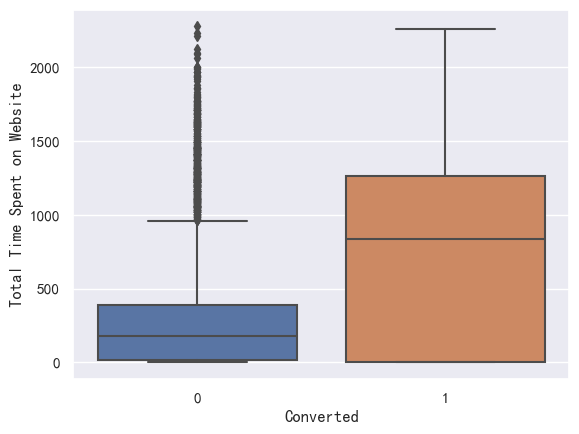

In [788]:
con2cat_analysis(data,'Total Time Spent on Website')

#### Page Views Per Visit 无关，删除

KruskalResult(statistic=0.2884005222885417, pvalue=0.5912473409754269)


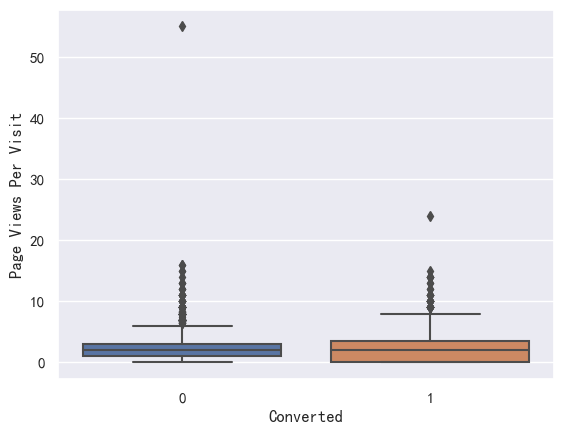

In [789]:
con2cat_analysis(data,'Page Views Per Visit')

In [790]:
data.drop(columns=['Page Views Per Visit'], axis=0, inplace=True)
x_test.drop(columns=['Page Views Per Visit'], axis=0, inplace=True)

#### TotalVisits 稍微有关

KruskalResult(statistic=5.3184605441371575, pvalue=0.021100645030214537)


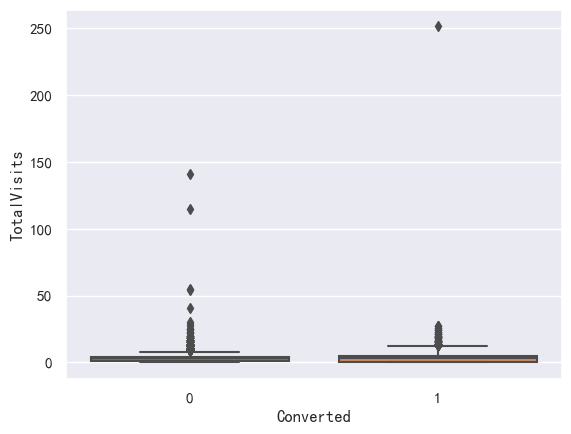

In [791]:
con2cat_analysis(data,'TotalVisits')

#### Lead Number 有关？

KruskalResult(statistic=5.342968671517156, pvalue=0.020806011931838054)


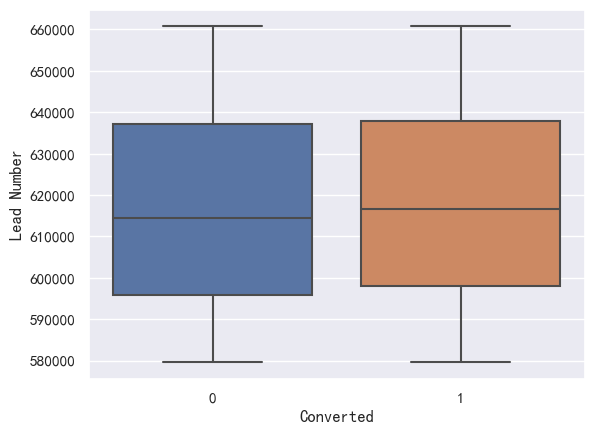

In [792]:
con2cat_analysis(data,'Lead Number')

## 类别-类别

In [793]:
def cat2cat_analysis(df, feature, target="Converted"):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)
    v = df[feature].value_counts()      
    a = v.plot(kind="bar", ax=ax[0])
    for container in a.containers:
        a.bar_label(container)
    tab = pd.crosstab(index=df[feature], columns=df[target], normalize="index")
    a = tab.plot(kind="bar", stacked=True, ax=ax[1])
    for container in a.containers:
        a.bar_label(container, label_type="center")
    tab2 = pd.crosstab(index=df[feature], columns=df[target])
    print("卡方P值：",stats.chi2_contingency(tab2)[1])

#### Prospect ID

In [794]:
data.drop(columns=['Prospect ID'], axis=0, inplace=True)
x_test.drop(columns=['Prospect ID'], axis=0, inplace=True)

#### Lead Origin 有关

卡方P值： 4.140911516176982e-159


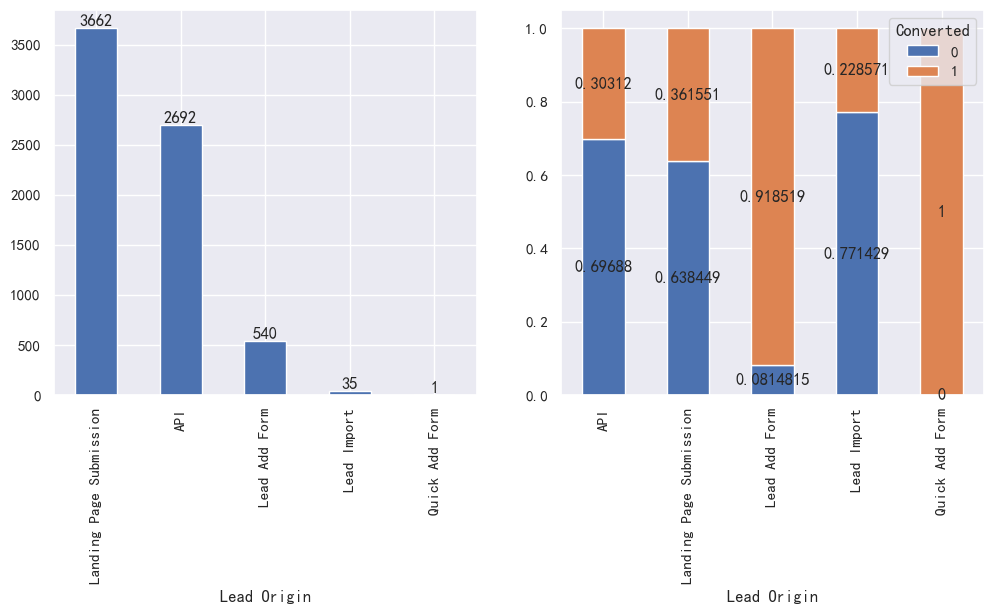

In [795]:
cat2cat_analysis(data, 'Lead Origin')

#### Lead Source 有关

卡方P值： 1.5686808946391622e-164


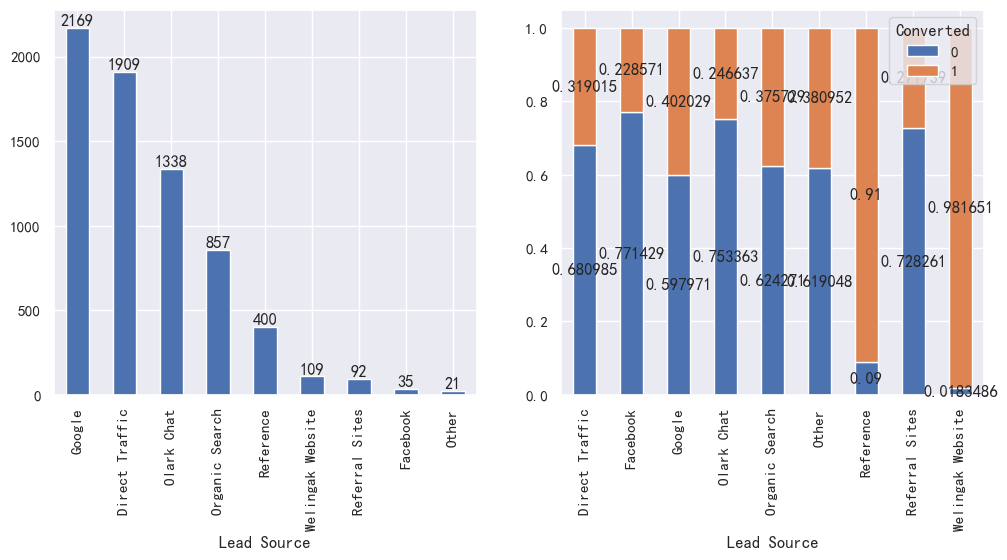

In [796]:
cat2cat_analysis(data, 'Lead Source')

#### Do Not Email 有关

卡方P值： 3.58941509034936e-25


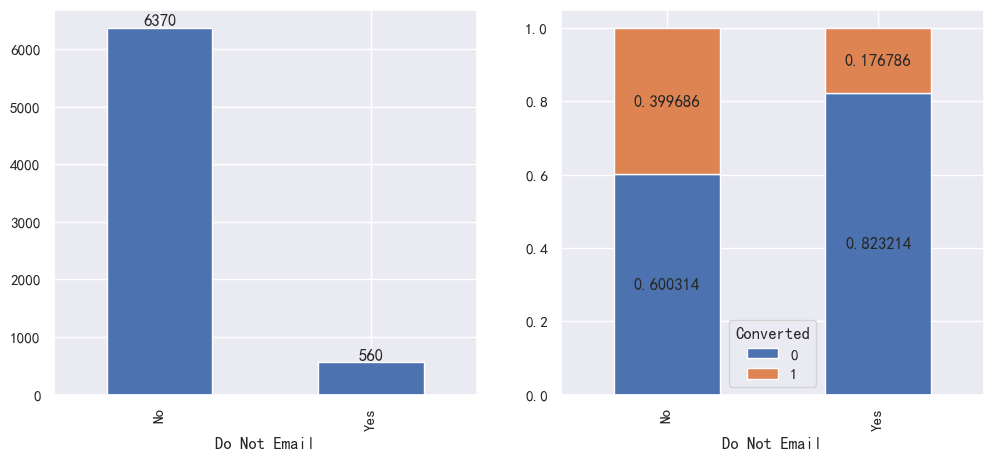

In [797]:
cat2cat_analysis(data, 'Do Not Email')

#### Do Not Call 无关 删

卡方P值： 0.8075494676830677


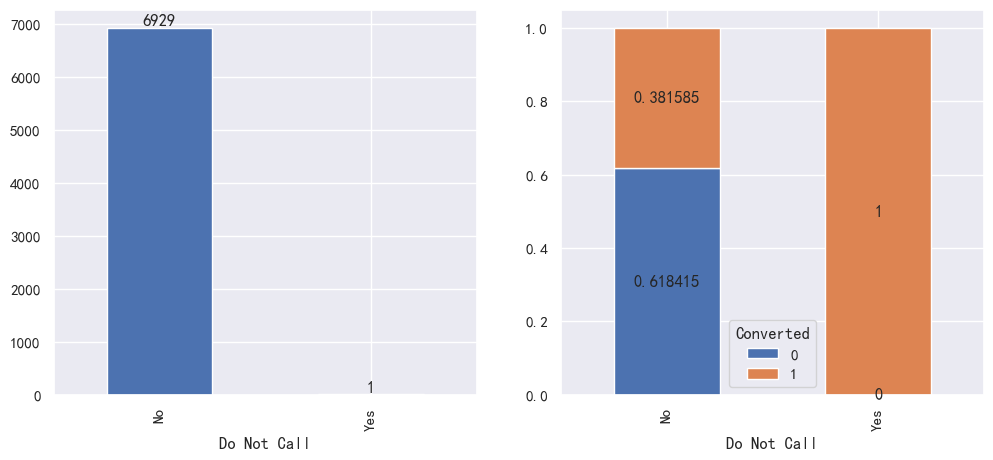

In [798]:
cat2cat_analysis(data, 'Do Not Call')

In [799]:
data.drop(columns=['Do Not Call'], axis=0, inplace=True)
x_test.drop(columns=['Do Not Call'], axis=0, inplace=True)

####  Last Activity 有关

卡方P值： 2.0949710413951444e-241


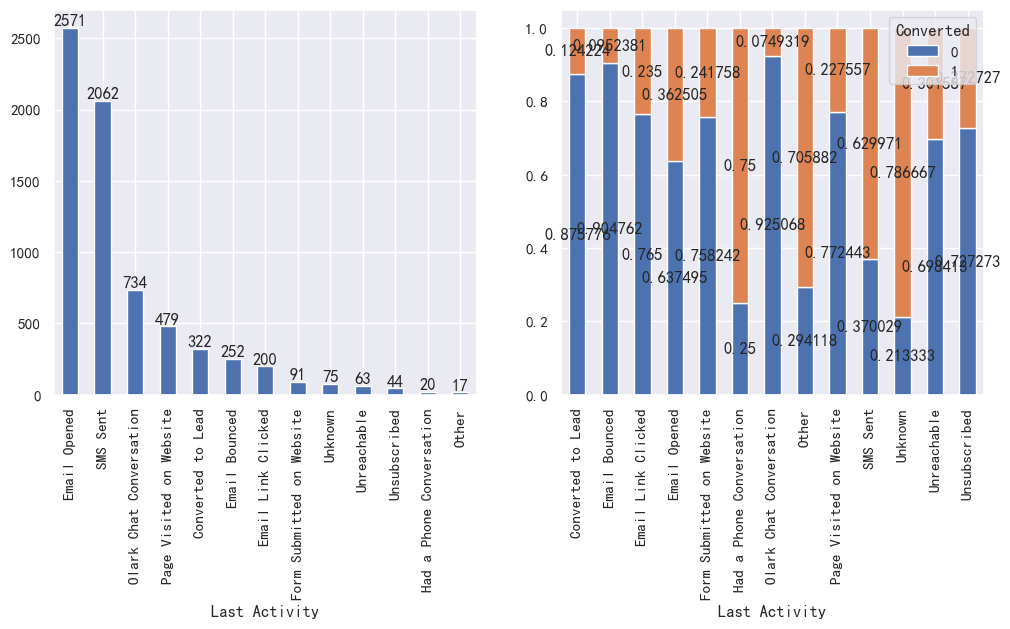

In [800]:
cat2cat_analysis(data, 'Last Activity')

#### Country 无关 删

卡方P值： 0.36568981601162664


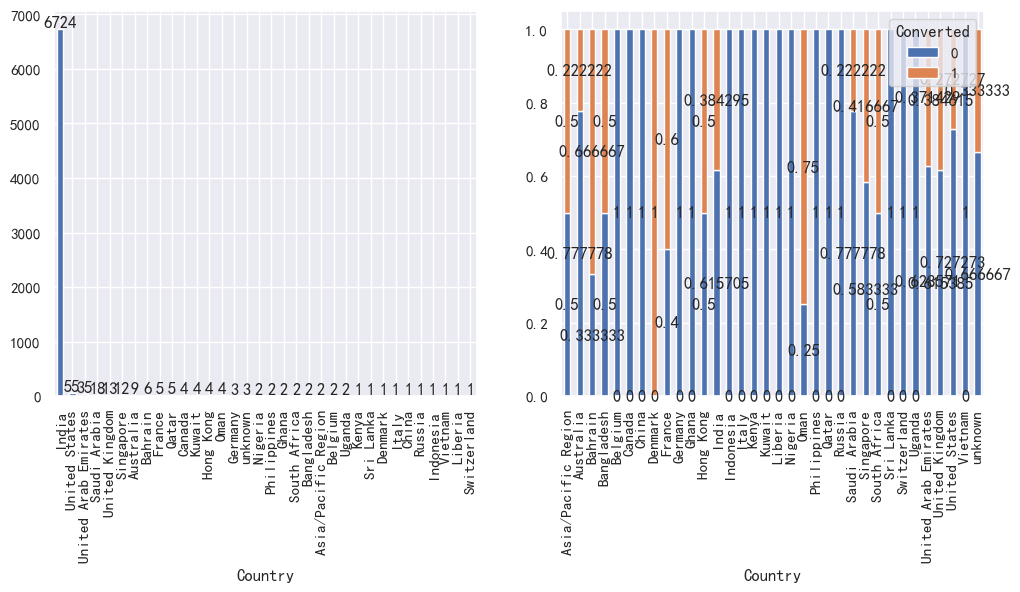

In [801]:
cat2cat_analysis(data, 'Country')

In [802]:
data.drop(columns=['Country'],axis=0, inplace=True)
x_test.drop(columns=['Country'],axis=0, inplace=True)

#### Specialization 有关

卡方P值： 1.4295940967327789e-30


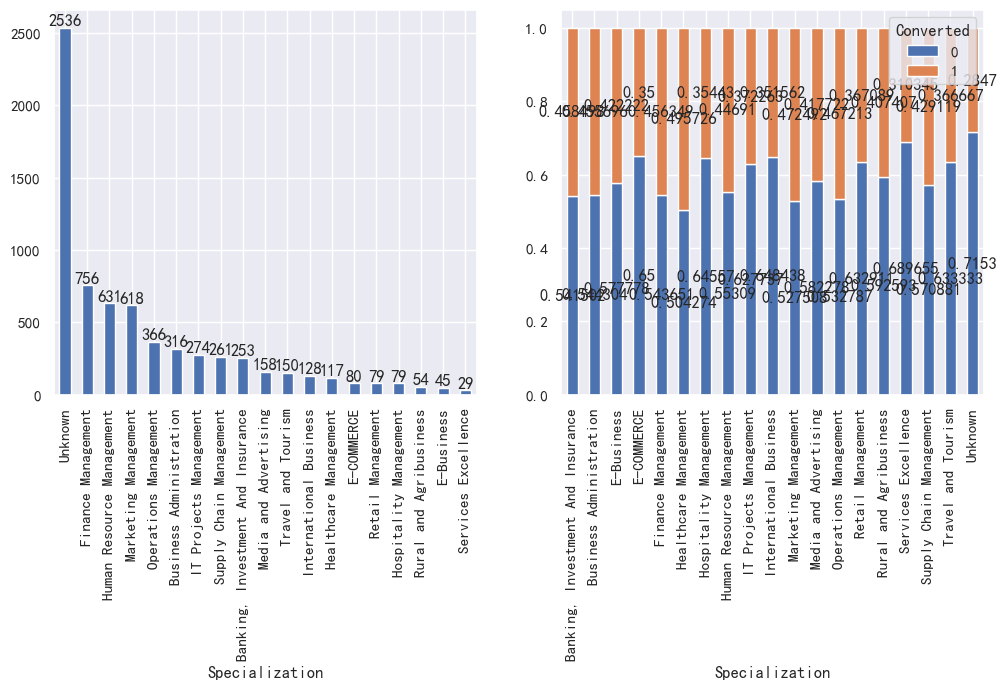

In [803]:
cat2cat_analysis(data, 'Specialization')

#### What is your current occupation 有关

卡方P值： 4.062276560116386e-255


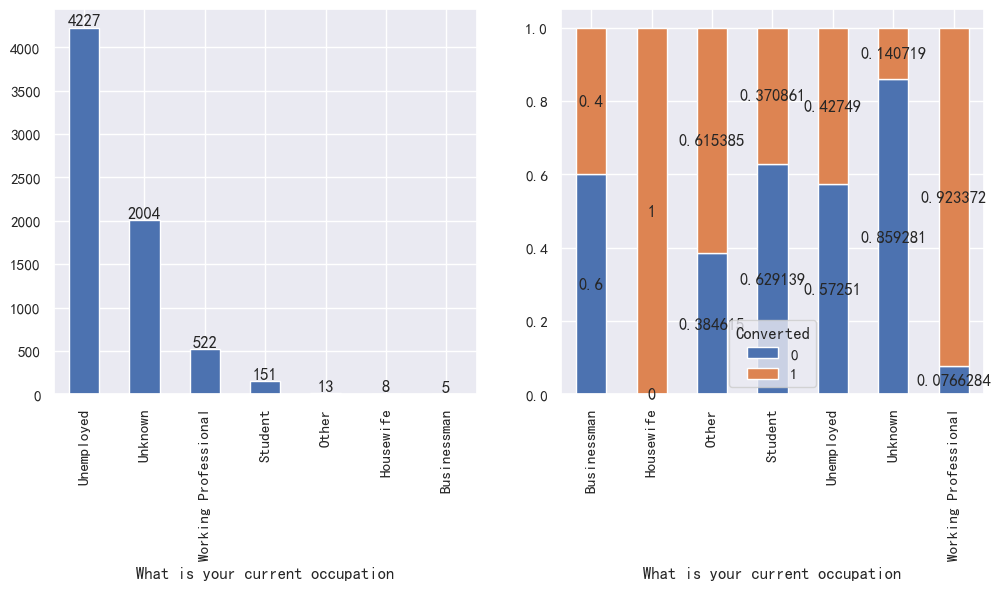

In [804]:
cat2cat_analysis(data, 'What is your current occupation')

#### What matters most to you in choosing a course 无关 删

卡方P值： 1.0


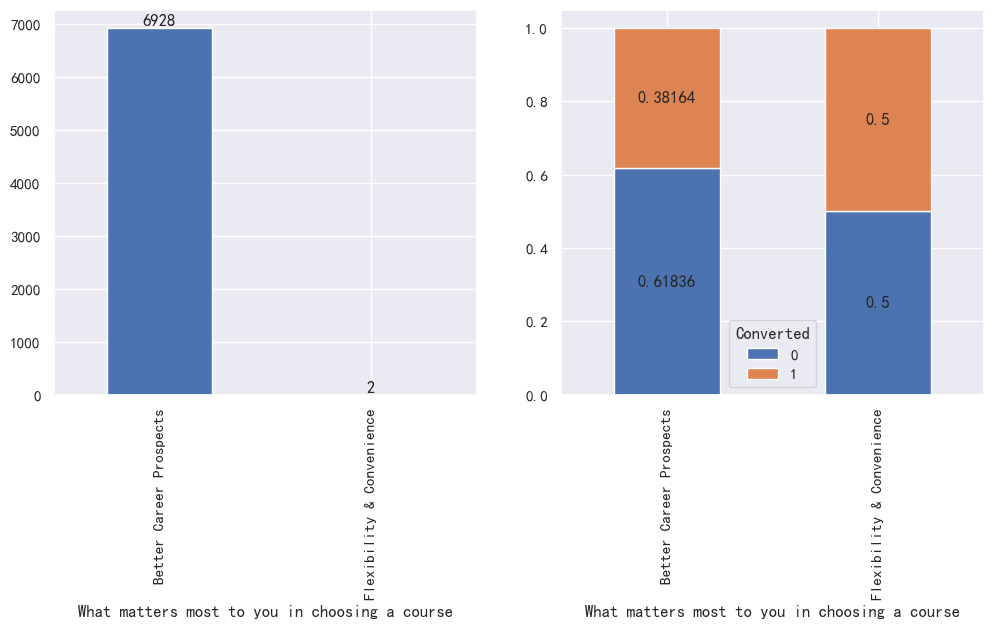

In [805]:
cat2cat_analysis(data, 'What matters most to you in choosing a course')

In [806]:
data.drop(columns=['What matters most to you in choosing a course'], axis=0, inplace=True)
x_test.drop(columns=['What matters most to you in choosing a course'], axis=0, inplace=True)

#### Search 无关 删

卡方P值： 1.0


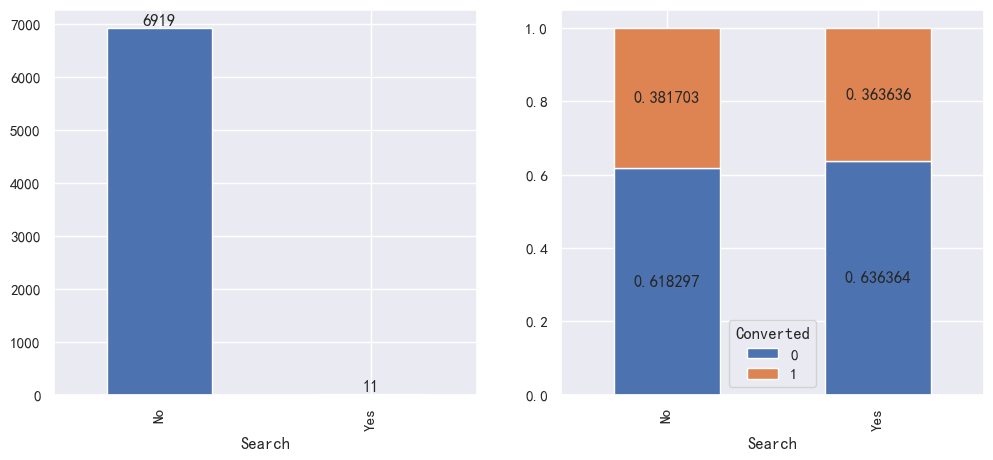

In [807]:
cat2cat_analysis(data, 'Search')

In [808]:
data.drop(columns=['Search'],axis=0,inplace=True)
x_test.drop(columns=['Search'],axis=0,inplace=True)

#### Magazine 无关 删

卡方P值： 1.0


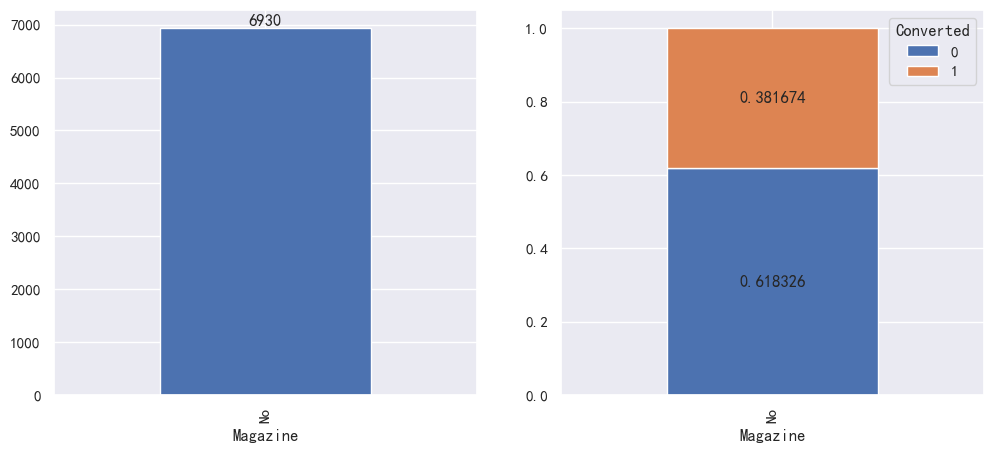

In [809]:
cat2cat_analysis(data, 'Magazine')

In [810]:
data.drop(columns=['Magazine'],axis=0,inplace=True)
x_test.drop(columns=['Magazine'],axis=0,inplace=True)

#### Newspaper Article 无关 删

卡方P值： 0.8075494676830677


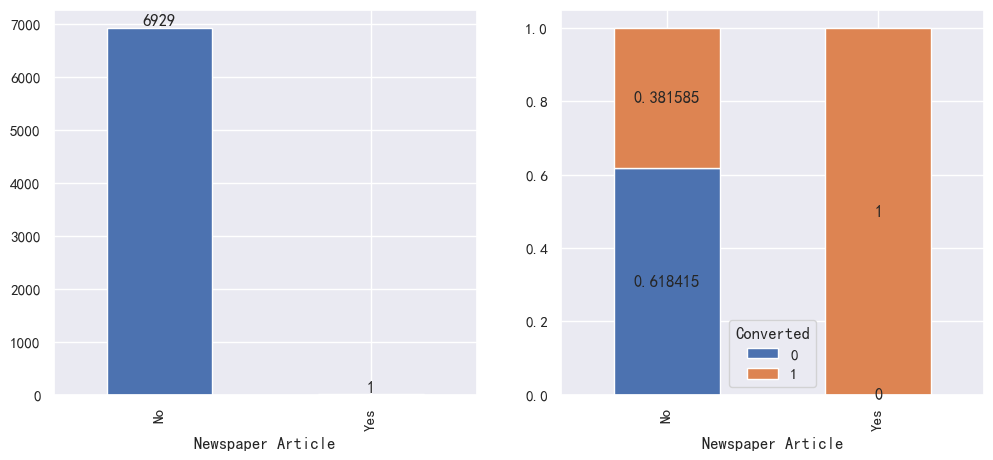

In [811]:
cat2cat_analysis(data, 'Newspaper Article')

In [812]:
data.drop(columns=['Newspaper Article'],axis=0,inplace=True)
x_test.drop(columns=['Newspaper Article'],axis=0,inplace=True)

#### X Education Forums 无关 删

卡方P值： 1.0


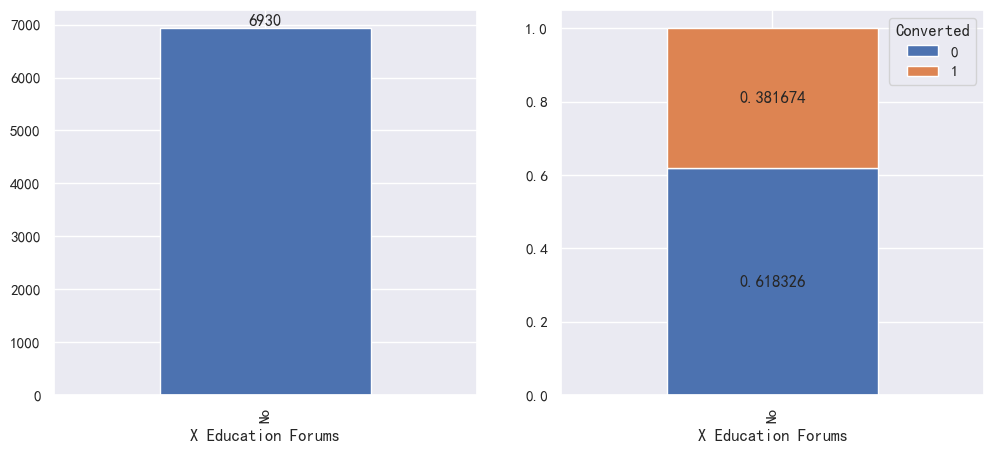

In [813]:
cat2cat_analysis(data, 'X Education Forums')

In [814]:
data.drop(columns=['X Education Forums'],axis=0,inplace=True)
x_test.drop(columns=['X Education Forums'],axis=0,inplace=True)

#### Newspaper 无关 删

卡方P值： 1.0


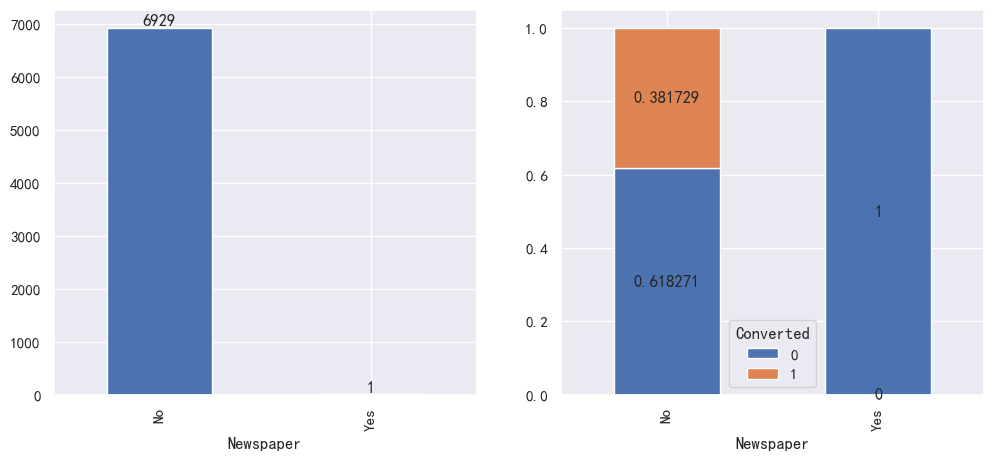

In [815]:
cat2cat_analysis(data, 'Newspaper')

In [816]:
data.drop(columns=['Newspaper'],axis=0,inplace=True)
x_test.drop(columns=['Newspaper'],axis=0,inplace=True)

#### Digital Advertisement 无关 删

卡方P值： 0.7014427131589067


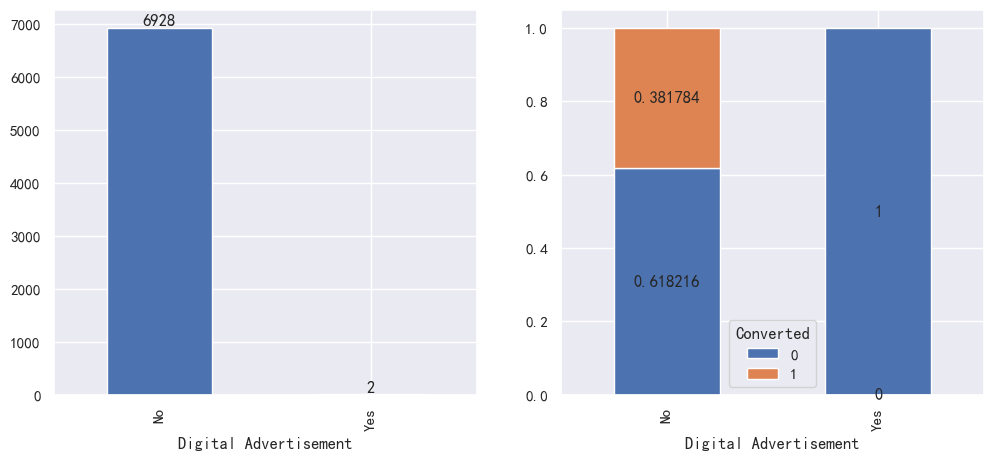

In [817]:
cat2cat_analysis(data, 'Digital Advertisement')

In [818]:
data.drop(columns=['Digital Advertisement'],axis=0,inplace=True)
x_test.drop(columns=['Digital Advertisement'],axis=0,inplace=True)

#### Through Recommendations 无关 删

卡方P值： 0.3163197920421488


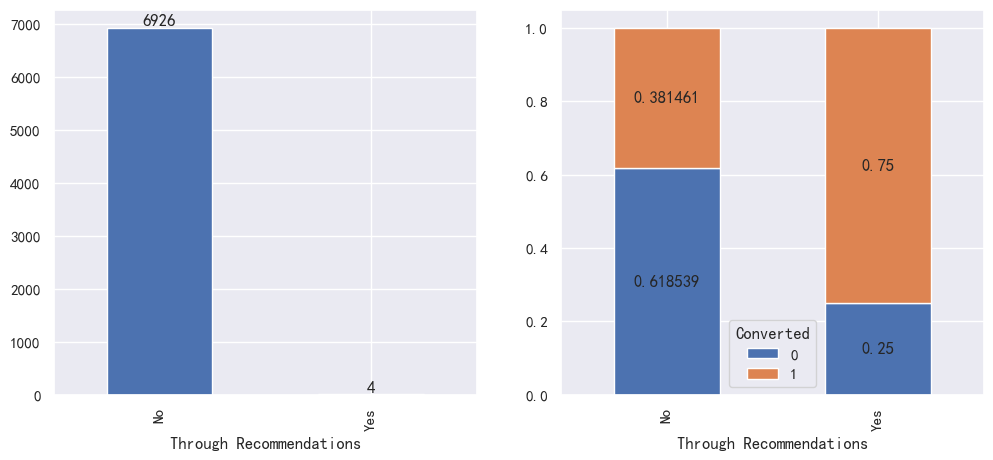

In [819]:
cat2cat_analysis(data, 'Through Recommendations')

In [820]:
data.drop(columns=['Through Recommendations'],axis=0,inplace=True)
x_test.drop(columns=['Through Recommendations'],axis=0,inplace=True)

#### Receive More Updates About Our Courses 无关 删

卡方P值： 1.0


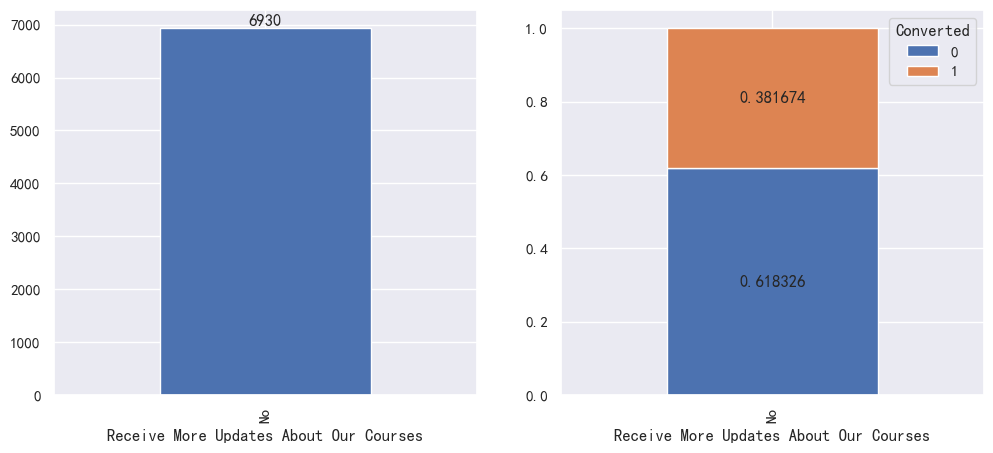

In [821]:
cat2cat_analysis(data, 'Receive More Updates About Our Courses')

In [822]:
data.drop(columns=['Receive More Updates About Our Courses'],axis=0,inplace=True)
x_test.drop(columns=['Receive More Updates About Our Courses'],axis=0,inplace=True)

#### Tags 有关

卡方P值： 0.0


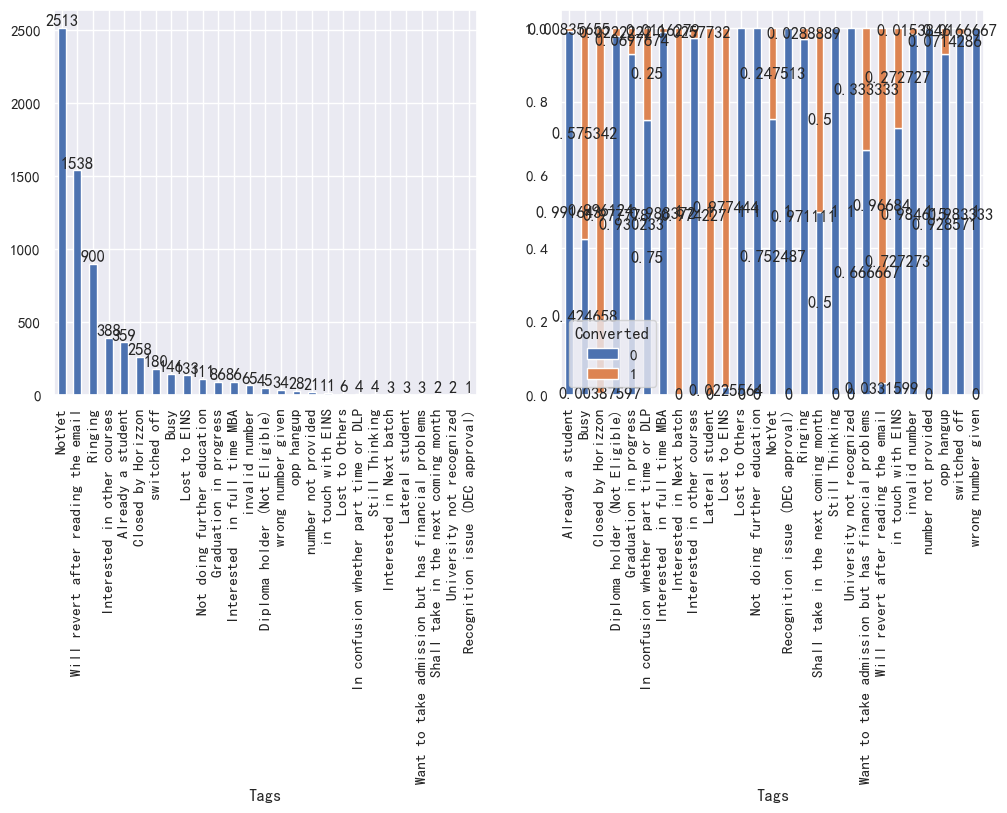

In [823]:
cat2cat_analysis(data, 'Tags')

#### Update me on Supply Chain Content 无关 删

卡方P值： 1.0


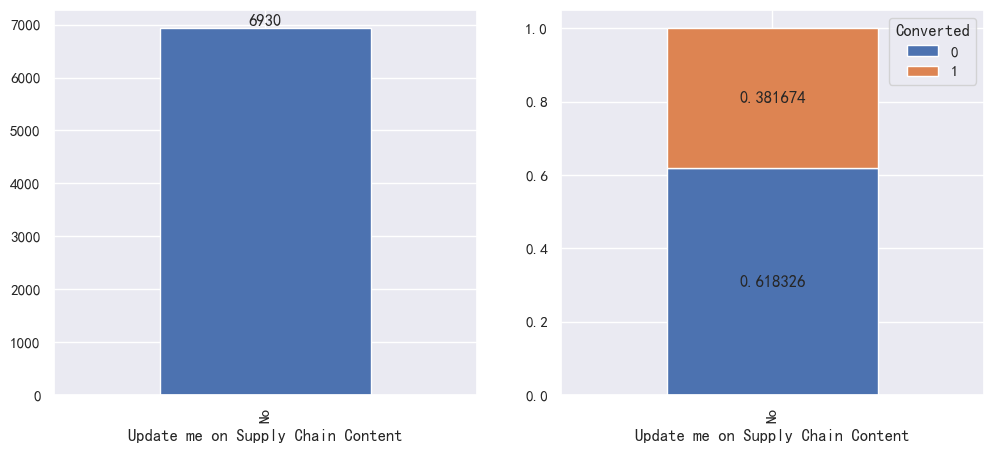

In [824]:
cat2cat_analysis(data, 'Update me on Supply Chain Content')

In [825]:
data.drop(columns=['Update me on Supply Chain Content'],axis=0,inplace=True)
x_test.drop(columns=['Update me on Supply Chain Content'],axis=0,inplace=True)

#### Get updates on DM Content 无关 删

卡方P值： 1.0


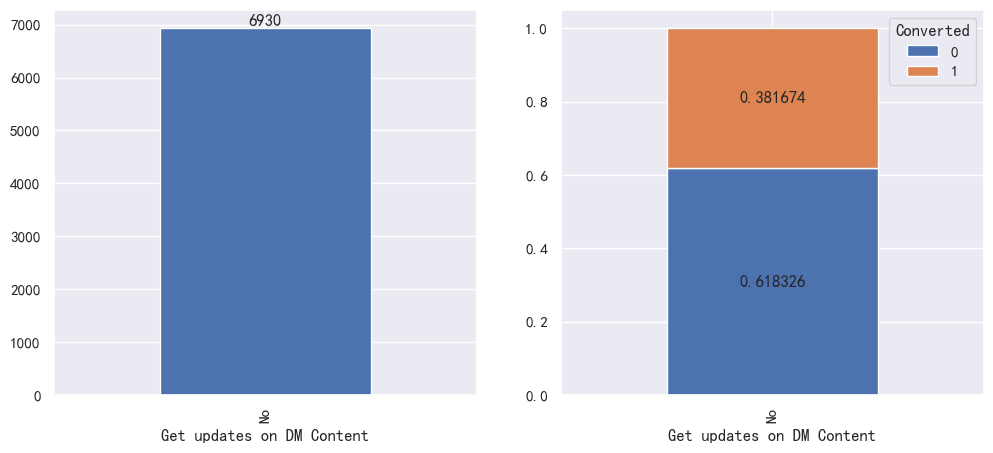

In [826]:
cat2cat_analysis(data, 'Get updates on DM Content')

In [827]:
data.drop(columns=['Get updates on DM Content'],axis=0,inplace=True)
x_test.drop(columns=['Get updates on DM Content'],axis=0,inplace=True)

#### City 有关

卡方P值： 4.08048782126196e-07


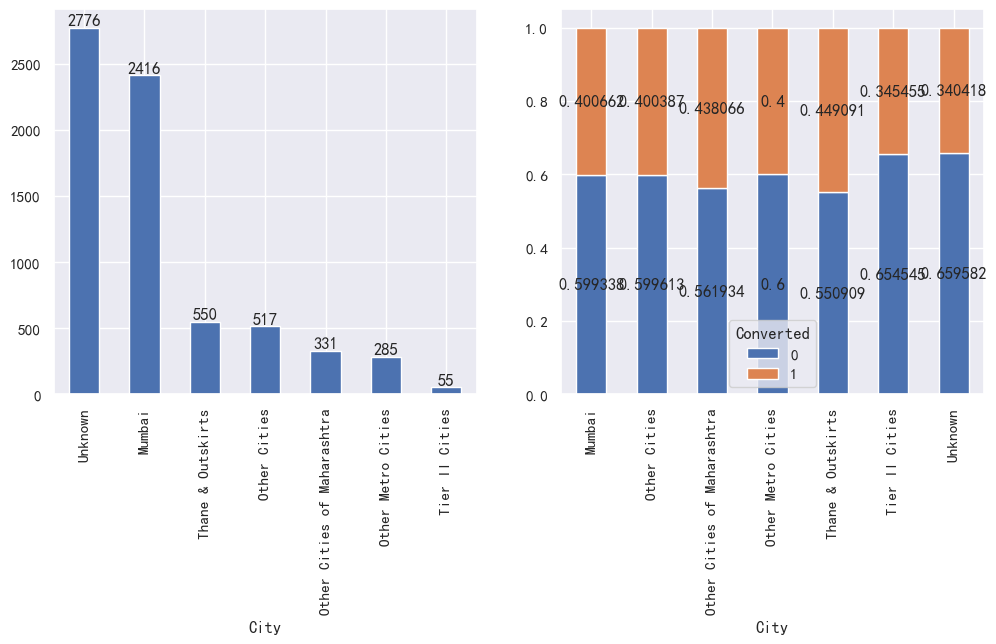

In [828]:
cat2cat_analysis(data, 'City')

#### I agree to pay the amount through cheque 无关 删

卡方P值： 1.0


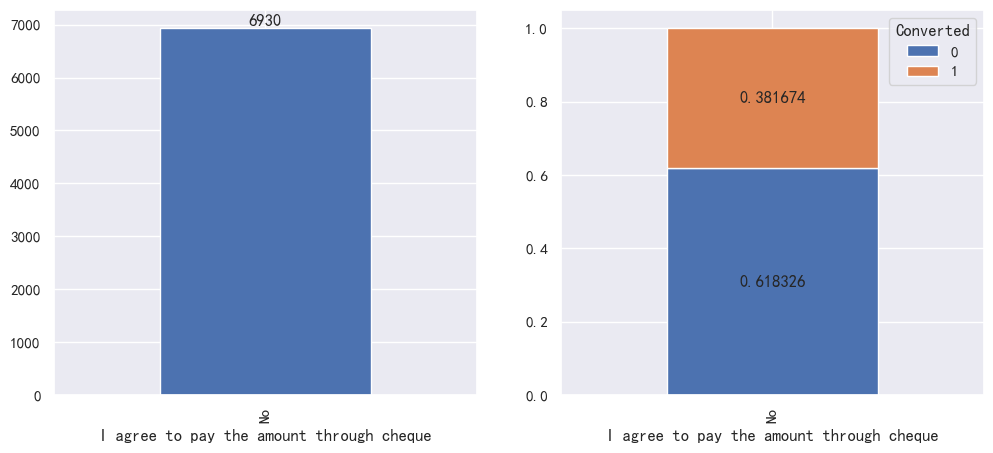

In [829]:
cat2cat_analysis(data, 'I agree to pay the amount through cheque')

In [830]:
data.drop(columns=['I agree to pay the amount through cheque'],axis=0,inplace=True)
x_test.drop(columns=['I agree to pay the amount through cheque'],axis=0,inplace=True)

#### A free copy of Mastering The Interview 有关

卡方P值： 0.0066912680842654846


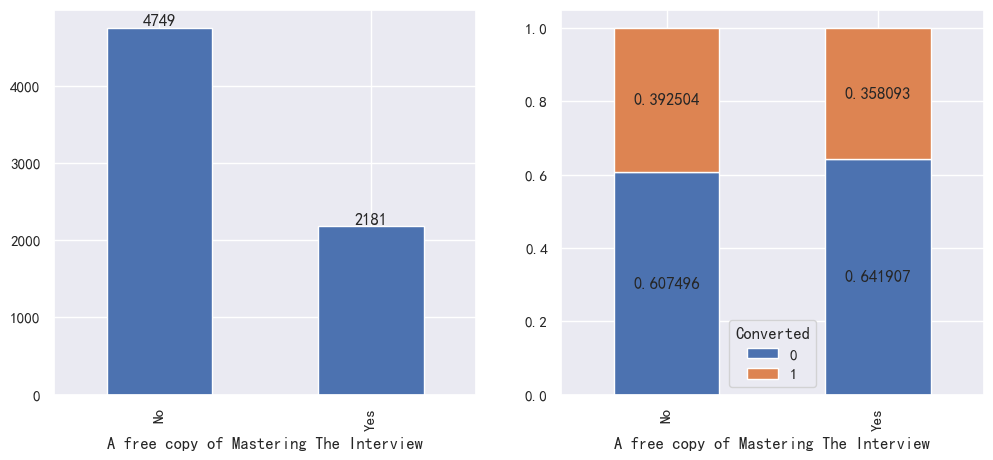

In [831]:
cat2cat_analysis(data, 'A free copy of Mastering The Interview')

#### Last Notable Activity 有关

卡方P值： 5.9266916472265396e-207


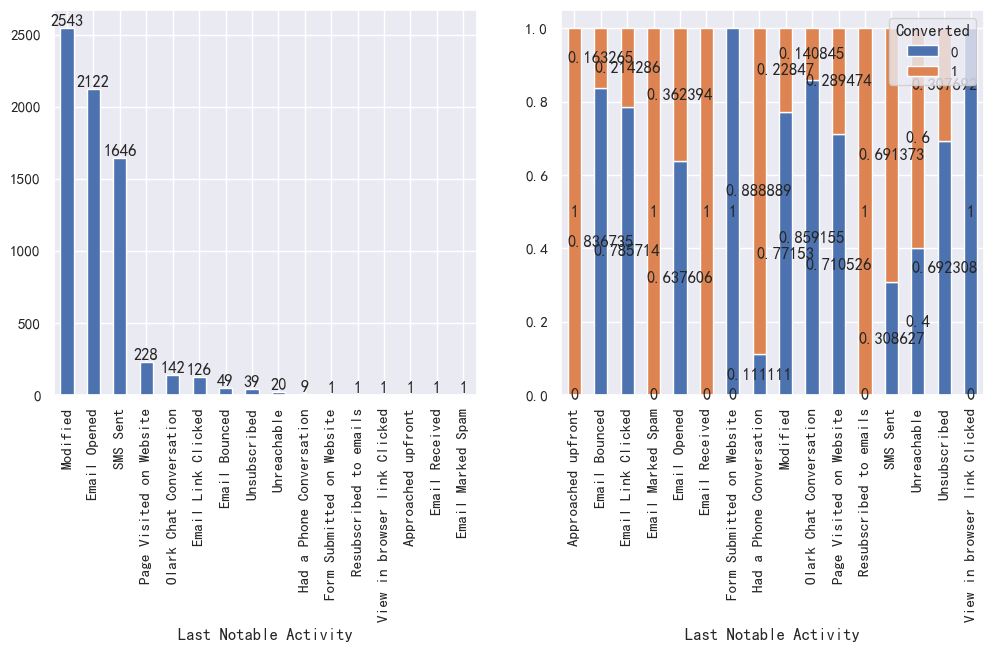

In [832]:
cat2cat_analysis(data, 'Last Notable Activity')

In [833]:
data.shape[1]

14

In [834]:
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'TotalVisits', 'Total Time Spent on Website', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Converted'],
      dtype='object')

In [835]:
x_col = data.columns.tolist()
x_col.remove('Converted')
x_col

['Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [836]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

y_train = data['Converted']
x_train = data[x_col]

In [838]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6930 entries, 6458 to 235
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6930 non-null   int64  
 1   Lead Origin                             6930 non-null   object 
 2   Lead Source                             6930 non-null   object 
 3   Do Not Email                            6930 non-null   object 
 4   TotalVisits                             6930 non-null   float64
 5   Total Time Spent on Website             6930 non-null   int64  
 6   Last Activity                           6930 non-null   object 
 7   Specialization                          6930 non-null   object 
 8   What is your current occupation         6930 non-null   object 
 9   Tags                                    6930 non-null   object 
 10  City                                    6930 non-null   object 

# OneHot

In [839]:
ohe_obj = [
    'Lead Origin',
    'Lead Source',
    'Do Not Email',
    'Last Activity',
    'Specialization',
    'What is your current occupation',
    'Tags',
    'City',
    'A free copy of Mastering The Interview',
    'Last Notable Activity'
    ]

In [841]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
x_train_ohe = ohe.fit_transform(x_train[ohe_obj])
x_test_ohe = ohe.transform(x_test[ohe_obj])

# StandardScaler

In [842]:
x_train_num = x_train[['Lead Number', 'TotalVisits', 'Total Time Spent on Website']]
x_test_num = x_test[['Lead Number', 'TotalVisits', 'Total Time Spent on Website']]

In [843]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_n = ss.fit_transform(x_train_num)
x_test_n = ss.transform(x_test_num)

In [844]:
x_train = np.concatenate([x_train_ohe, x_train_n], axis=1)
x_test = np.concatenate([x_test_ohe, x_test_n], axis=1)


# 决策树和随机森林

In [846]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print("决策树正确率：")
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))
print("bagging正确率：")
bag = BaggingClassifier(
    estimator=tree, 
    bootstrap=True,
    bootstrap_features=True, 
    max_features=0.7,
    max_samples=0.7, 
    n_estimators=100
    )
bag.fit(x_train, y_train)
print(bag.score(x_train, y_train))
print(bag.score(x_test, y_test))

DecisionTreeClassifier()

决策树正确率：
1.0
0.9225108225108225
bagging正确率：


BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.7, max_samples=0.7, n_estimators=100)

0.9937950937950938
0.9428571428571428


# xgboost

In [851]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

xgb_clf = xgb.XGBClassifier(
    learning_rate=0.2, 
    n_estimators=400, 
    max_depth=3,
    subsample=0.8, 
    gamma=1, 
    reg_alpha=0, 
    reg_lambda=1,
    colsample_bytree=0.8
    )
xgb_clf.fit(x_train, y_train)
print(xgb_clf.score(x_train, y_train))
print(xgb_clf.score(x_test, y_test))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.9741702741702741
0.9424242424242424


# pca